**Registration No: 2016331020**

# **Task #05**

### **Read and Try to understand and run the programs from the following link:**
[https://inst.eecs.berkeley.edu/~ee123/sp15/lab/lab6/Pre-Lab6-Intro-to-Digital-Communications.html](https://inst.eecs.berkeley.edu/~ee123/sp15/lab/lab6/Pre-Lab6-Intro-to-Digital-Communications.html)

In [1]:
%pylab
# Import functions and libraries
import numpy as np
import matplotlib.pyplot as plt
import threading,time
import sys

from numpy import pi
from numpy import sin
from numpy import zeros
from numpy import r_
from scipy import signal
from scipy import integrate

import threading,time
import multiprocessing

from numpy import mean
from numpy import power
from numpy.fft import fft
from numpy.fft import fftshift
from numpy.fft import ifft
from numpy.fft import ifftshift
from  scipy.io.wavfile import read as wavread


%matplotlib inline

Using matplotlib backend: agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
# Plot an image of the spectrogram y, with the axis labeled with time tl,
# and frequency fl
#
# t_range -- time axis label, nt samples
# f_range -- frequency axis label, nf samples
# y -- spectrogram, nf by nt array
# dbf -- Dynamic range of the spect

def sg_plot( t_range, f_range, y, dbf = 60) :
    eps = 1e-3
    
    # find maximum
    y_max = abs(y).max()
    
    # compute 20*log magnitude, scaled to the max
    y_log = 20.0 * np.log10( abs( y ) / y_max + eps )
    
    fig=figure(figsize=(15,6))
    
    plt.imshow( np.flipud( 64.0*(y_log + dbf)/dbf ), extent= t_range  + f_range ,cmap=plt.cm.gray, aspect='auto')
    plt.xlabel('Time, s')
    plt.ylabel('Frequency, Hz')
    plt.tight_layout()


def myspectrogram_hann_ovlp(x, m, fs, fc,dbf = 60):
    # Plot the spectrogram of x.
    # First take the original signal x and split it into blocks of length m
    # This corresponds to using a rectangular window %
    
    
    isreal_bool = isreal(x).all()
    
    # pad x up to a multiple of m 
    lx = len(x);
    nt = (lx + m - 1) // m
    x = append(x,zeros(-lx+nt*m))
    x = x.reshape((m//2,nt*2), order='F')
    x = concatenate((x,x),axis=0)
    x = x.reshape((m*nt*2,1),order='F')
    x = x[r_[m//2:len(x),ones(m//2)*(len(x)-1)].astype(int)].reshape((m,nt*2),order='F')
    
    
    xmw = x * hanning(m)[:,None];
    
    
    # frequency index
    t_range = [0.0, lx / fs]
    
    if isreal_bool:
        f_range = [ fc, fs / 2.0 + fc]
        xmf = np.fft.fft(xmw,len(xmw),axis=0)
        sg_plot(t_range, f_range, xmf[0:m//2,:],dbf=dbf)
        print (1)
    else:
        f_range = [-fs / 2.0 + fc, fs / 2.0 + fc]
        xmf = np.fft.fftshift( np.fft.fft( xmw ,len(xmw),axis=0), axes=0 )
        sg_plot(t_range, f_range, xmf,dbf = dbf)
    
    return t_range, f_range, xmf

In [3]:
fs = 44100  # sampling rate
baud = 300  # symbol rate
Nbits = 10  # number of bits
Ns = int(fs/baud)
N = Nbits * Ns
f0 = 1800
bits = randn(Nbits,1) > 0

Text(0.5, 1.0, 'OOK signal of the sequence:[[1 0 0 0 1 0 1 0 1 0]]')

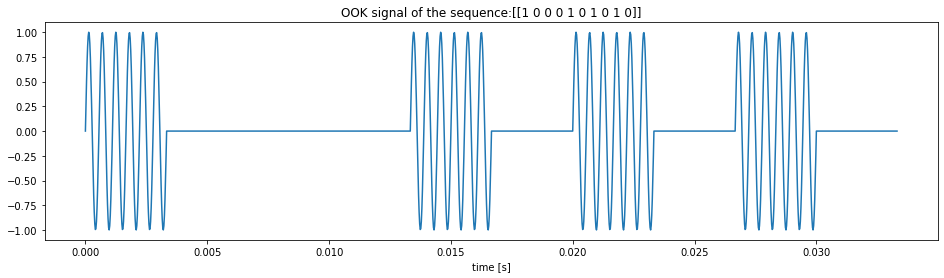

In [4]:
np.random.seed(seed=1)
bits = randn(Nbits,1) > 0
M = np.tile(bits,(1,Ns))
t = r_[0.0:N]/fs
OOK = M.ravel()*sin(2*pi*f0*t)

fig = figure(figsize = (16,4))
plot(t,OOK)
xlabel('time [s]')
title('OOK signal of the sequence:'+ np.array2string(transpose(np.uint8(bits))))

(0.0, 4096.0, 0.0, 294.0)

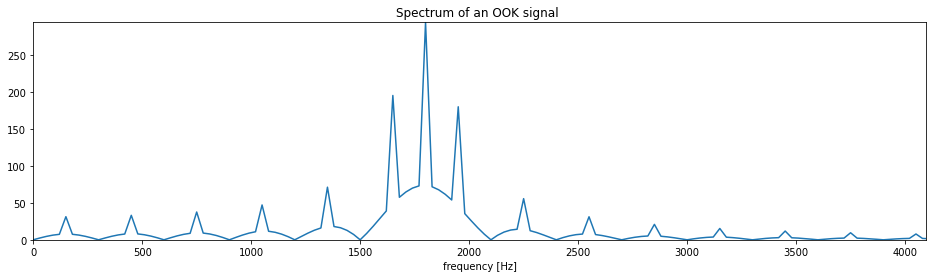

In [5]:
f = r_[0:N/2.0]/N*fs

OOK_f = (np.fft.fft(OOK))

fig = figure(figsize = (16,4))
plot(f,abs(OOK_f[:len(OOK_f)//2]))
xlabel('frequency [Hz]')
title('Spectrum of an OOK signal ')
axis((0,4096,0,max(abs(OOK_f))))

(0.0, 4096.0, 0.0, 1.9970256011631373)

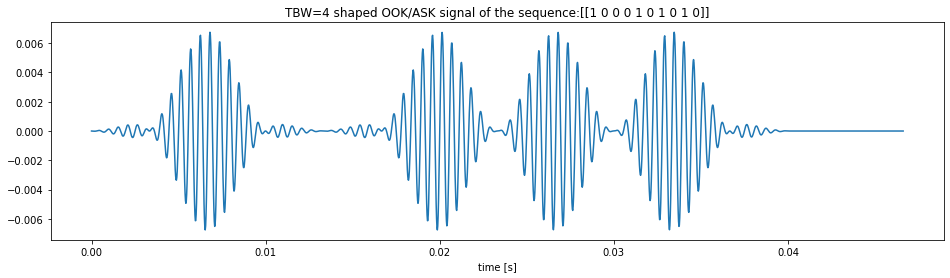

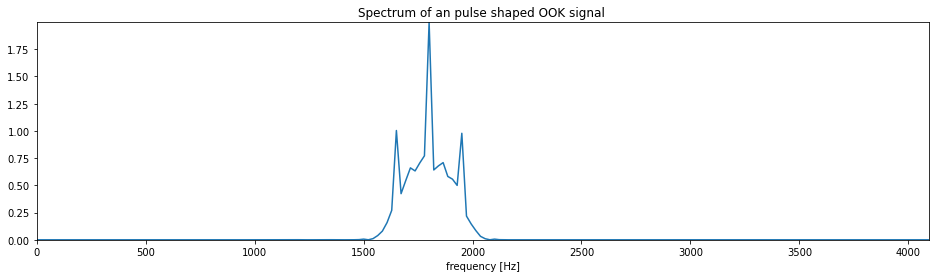

In [6]:
imp = zeros(N)
imp[::Ns] = bits.ravel()

h = signal.firwin(Ns*4,1.0/Ns)
imp_sinc = signal.fftconvolve(imp,h,mode='full')
t = r_[0.0:len(imp_sinc)]/fs
OOK_s = imp_sinc*sin(2*pi*f0*t)


fig = figure(figsize = (16,4))
plot(t,OOK_s)
xlabel('time [s]')
title('TBW=4 shaped OOK/ASK signal of the sequence:'+ np.array2string(transpose(np.uint8(bits))))

f = r_[0:len(imp_sinc)/2.0]/len(imp_sinc)*fs
OOK_sf = (np.fft.fft(OOK_s))

fig = figure(figsize = (16,4))
plot(f,abs(OOK_sf[0:len(OOK_sf)//2+1]))
xlabel('frequency [Hz]')
title('Spectrum of an pulse shaped OOK signal ')
axis((0,4096,0,max(abs(OOK_sf))))

Text(0.5, 1.0, 'BPSK signal of the sequence:[[1 0 0 0 1 0 1 0 1 0]]')

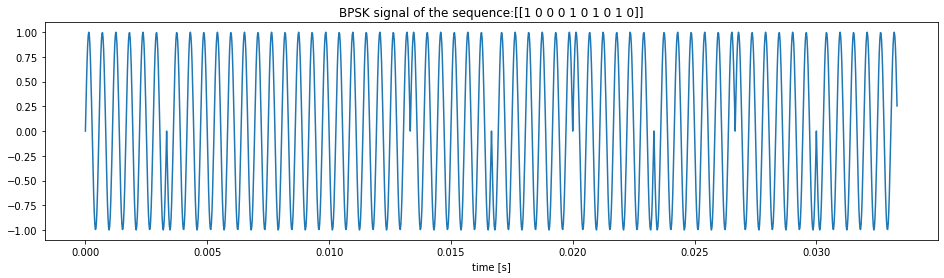

In [7]:

np.random.seed(seed=1)
bits = randn(Nbits,1) > 0 
M = np.tile(bits*2-1,(1,Ns))
t = r_[0.0:N]/fs
BPSK = M.ravel()*sin(2*pi*f0*t)

fig = figure(figsize = (16,4))
plot(t,BPSK)
xlabel('time [s]')
title('BPSK signal of the sequence:'+ np.array2string(transpose(np.uint8(bits))))

(0.0, 4096.0, 0.0, 390.26447963622365)

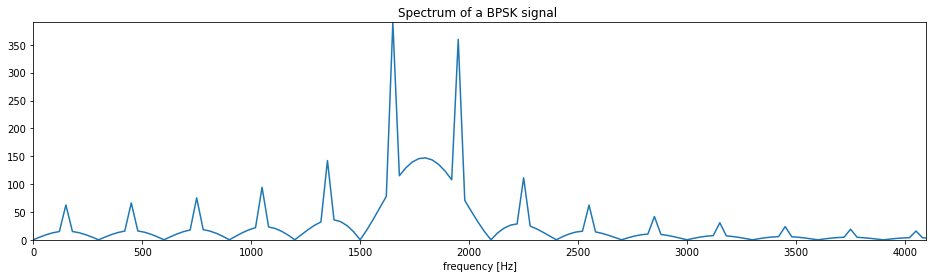

In [8]:

f = r_[0:N/2.0]/N*fs

BPSK_f = (np.fft.fft(BPSK))

fig = figure(figsize = (16,4))
plot(f,abs(BPSK_f[0:len(BPSK_f)//2]))
xlabel('frequency [Hz]')
title('Spectrum of a BPSK signal ')
axis((0,4096,0,max(abs(BPSK_f))))

(0.0, 4096.0, 0.0, 2.0076543433726286)

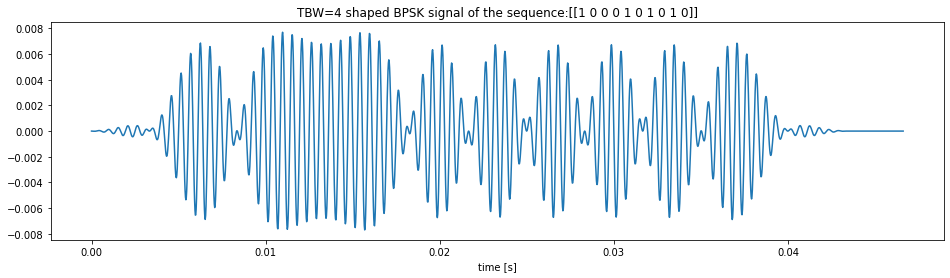

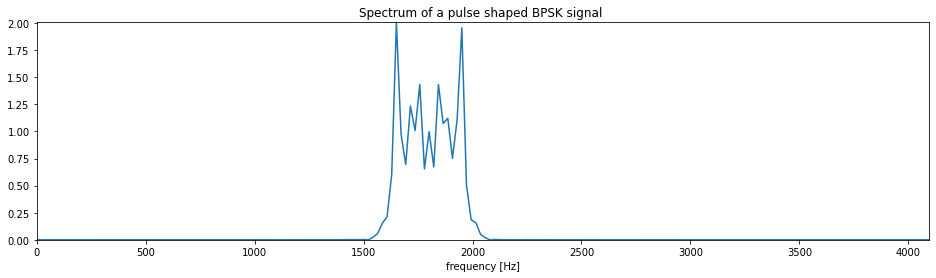

In [9]:
imp = zeros(N)
imp[::Ns] = bits.ravel()*2-1

h = signal.firwin(Ns*4,1.0/Ns)
imp_sinc = signal.fftconvolve(imp,h,mode='full')
t = r_[0.0:len(imp_sinc)]/fs
BPSK_s = imp_sinc*sin(2*pi*f0*t)


fig = figure(figsize = (16,4))
plot(t,BPSK_s)
xlabel('time [s]')
title('TBW=4 shaped BPSK signal of the sequence:'+ np.array2string(transpose(np.uint8(bits))))

f = r_[0:len(imp_sinc)/2.0]/len(imp_sinc)*fs
BPSK_sf = (np.fft.fft(BPSK_s))

fig = figure(figsize = (16,4))
plot(f,abs(BPSK_sf[0:len(BPSK_sf)//2+1]))
xlabel('frequency [Hz]')
title('Spectrum of a pulse shaped BPSK signal ')
axis((0,4096,0,max(abs(BPSK_sf))))

Text(0.5, 1.0, 'QAM=16 of the sequence:[[ 6 11  0  4  2  1  2  5  6  8  6 10  3 14  0 10]]')

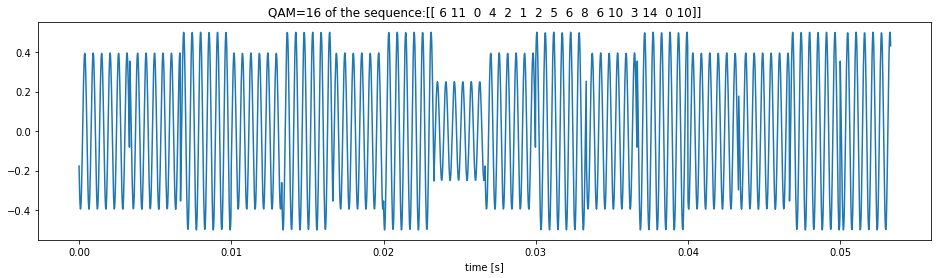

In [10]:
#code = { 2: -2+2j, 6: -1+2j, 14: 1+2j, 10: 2+2j,
#        3: -2+1j, 7: -1-1j, 15: 1+1j, 11: 2+1j,
#        1: -2-1j, 5: -1-1j, 13: 1-1j, 9: 2-1j,
#        0: -2-2j, 4: -1-2j, 12: 1-2j, 8: 2-2j}
Nbits = 16  # number of bits
N = Nbits * Ns
code = np.array((-2-2j, -2-1j,-2+2j,-2+1j,-1-2j,-1-1j,-1+2j,-1+1j,+2-2j,+2-1j,+2+2j,+2+1j,1-2j,+1-1j,1+2j,1+1j))/2
np.random.seed(seed=1)
bits = np.int16(rand(Nbits,1)*16) 
M = np.tile(code[bits],(1,Ns))
t = r_[0.0:N]/fs

# these are two ways of producing the same result:
#QAM = (M.real.ravel()*cos(2*pi*f0*t) - M.imag.ravel()*sin(2*pi*f0*t))/2/sqrt(2)
QAM = real(M.ravel()*exp(1j*2*pi*f0*t))/sqrt(2)/2
fig = figure(figsize = (16,4))
plot(t,QAM.real)
xlabel('time [s]')
title("QAM=16 of the sequence:"+ np.array2string(transpose(bits)))

(0.0, 4096.0, 0.0, 3.2219746046372206)

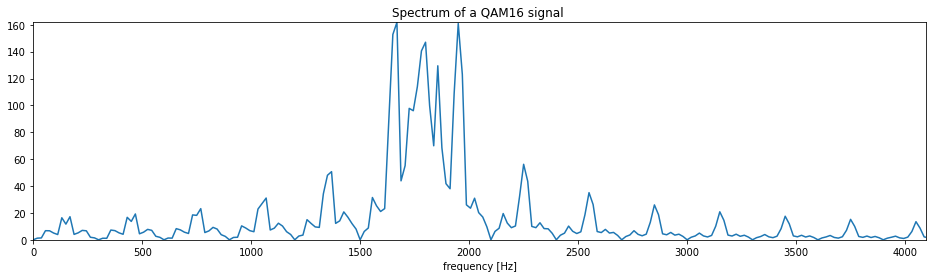

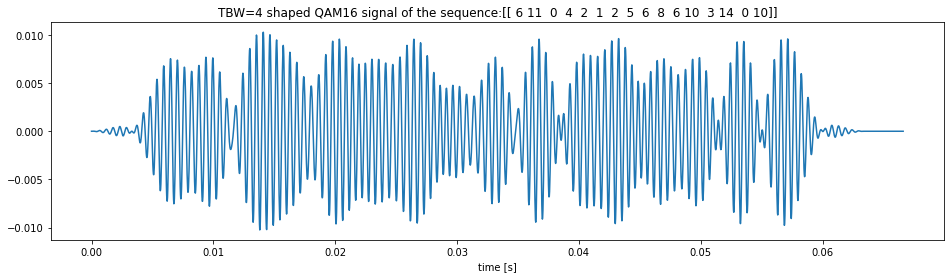

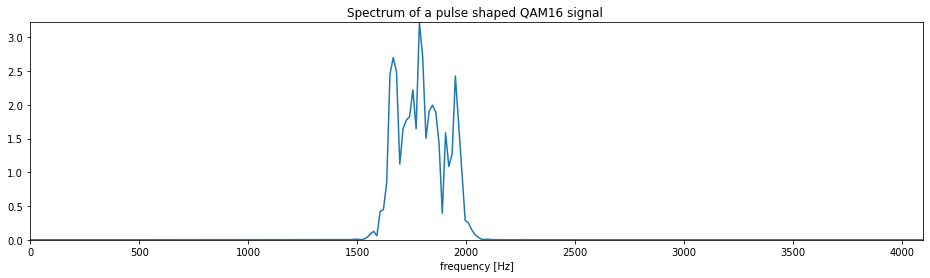

In [11]:

f = r_[0:N/2.0]/N*fs

QAM_f = (np.fft.fft(QAM))

fig = figure(figsize = (16,4))
plot(f,abs(QAM_f[0:len(QAM_f)//2]))
xlabel('frequency [Hz]')
title('Spectrum of a QAM16 signal ')
axis((0,4096,0,max(abs(QAM_f))))


imp = zeros(N,dtype='complex')
imp[::Ns] = code[bits].ravel()

h = signal.firwin(Ns*4,1.0/Ns)
imp_sinc = signal.fftconvolve(imp,h,mode='full')
t = r_[0.0:len(imp_sinc)]/fs
QAM_s = real(imp_sinc*exp(1j*2*pi*f0*t))


fig = figure(figsize = (16,4))
plot(t,QAM_s)
xlabel('time [s]')
title('TBW=4 shaped QAM16 signal of the sequence:'+ np.array2string(transpose(bits)))
f = r_[0:len(imp_sinc)/2.0]/len(imp_sinc)*fs
QAM_sf = (np.fft.fft(QAM_s))

fig = figure(figsize = (16,4))
plot(f,abs(QAM_sf[0:len(QAM_sf)//2+1]))
xlabel('frequency [Hz]')
title('Spectrum of a pulse shaped QAM16 signal ')
axis((0,4096,0,max(abs(QAM_sf))))

Text(0.5, 1.0, 'FSK signal of the sequence:[[1 0 0 0 1 0 1 0 1 0]]')

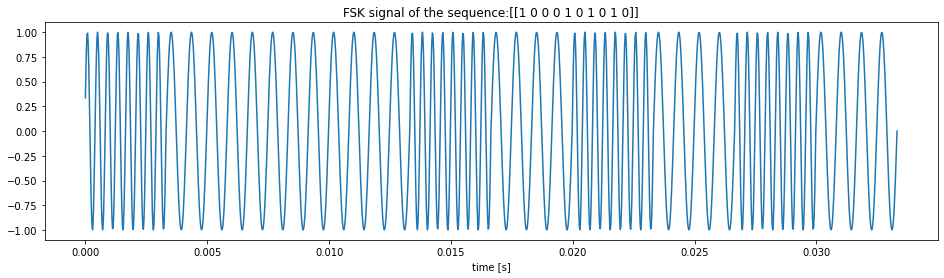

In [12]:
np.random.seed(seed=1)
Nbits = 10
N = Nbits * Ns
bits = randn(Nbits,1) > 0 
M = np.tile(bits*2-1,(1,Ns))
delta_f = 600


# compute phase by integrating frequency
ph = 2*pi*cumsum(f0 + M.ravel()*delta_f)/fs
t = r_[0.0:N]/fs
FSK = sin(ph)

fig = figure(figsize = (16,4))
plot(t,FSK)
xlabel('time [s]')
title('FSK signal of the sequence:'+ np.array2string(transpose(np.uint8(bits))))

(0.0, 4096.0, 0.0, 441.00000000000006)

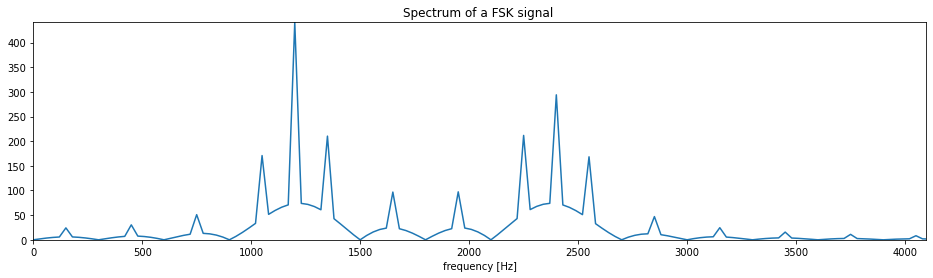

In [13]:
f = r_[0:N/2.0]/N*fs

FSK_f = (np.fft.fft(FSK))

fig = figure(figsize = (16,4))
plot(f,abs(FSK_f[0:len(FSK_f)//2]))
xlabel('frequency [Hz]')
title('Spectrum of a FSK signal ')
axis((0,4096,0,max(abs(FSK_f))))

1


Text(0.5, 1.0, 'Spectrogram of MSK')

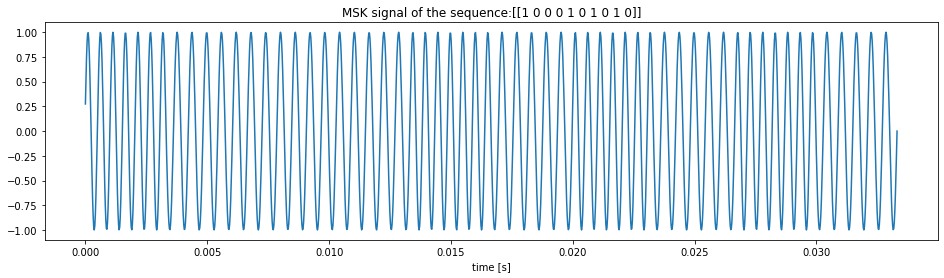

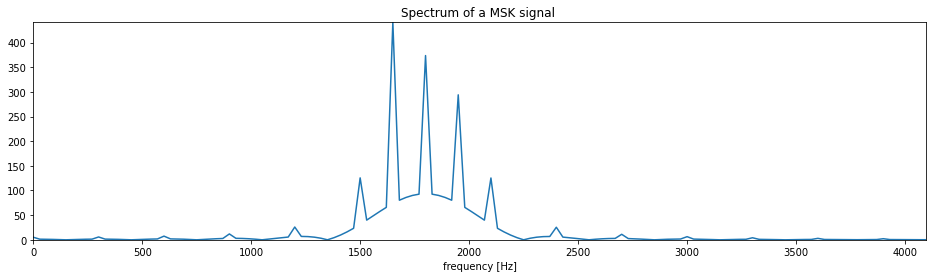

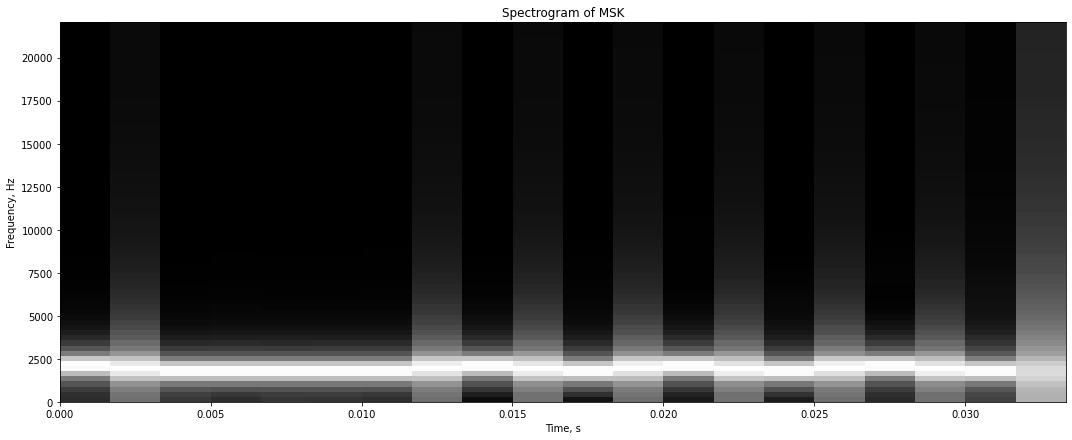

In [14]:

delta_f = 150
ph = 2*pi*cumsum(f0 + M.ravel()*delta_f)/fs
t = r_[0.0:N]/fs
MSK = sin(ph)

fig = figure(figsize = (16,4))
plot(t,MSK)
xlabel('time [s]')
title('MSK signal of the sequence:'+ np.array2string(transpose(np.uint8(bits))))

f = r_[0:N/2.0]/N*fs

MSK_f = (np.fft.fft(MSK))

fig = figure(figsize = (16,4))
plot(f,abs(MSK_f[0:len(MSK_f)//2]))
xlabel('frequency [Hz]')
title('Spectrum of a MSK signal ')
axis((0,4096,0,max(abs(MSK_f))))
tt,ff,xmf = myspectrogram_hann_ovlp(MSK, 148, 44100.0, 0,dbf = 60)
title('Spectrogram of MSK')

1


Text(0.5, 1.0, 'Spectrogram of GMSK')

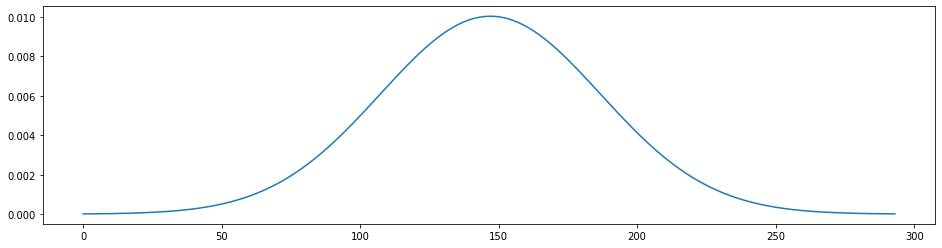

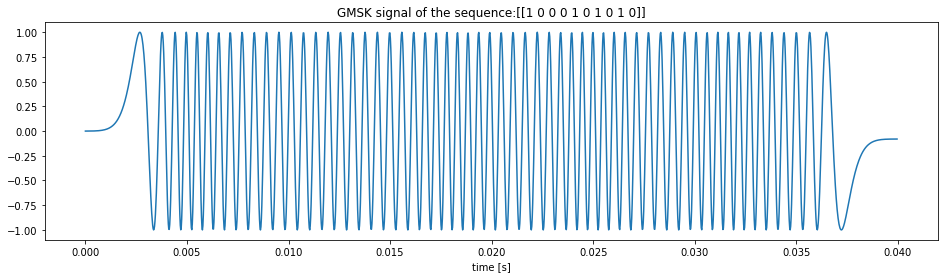

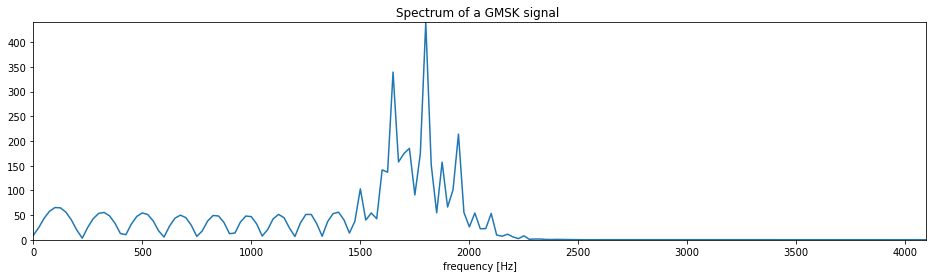

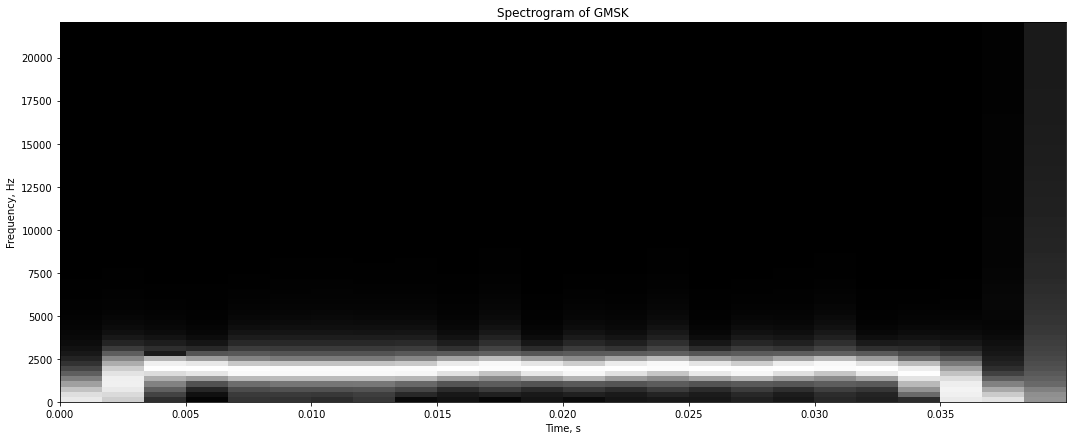

In [15]:
TBW =0.5
Tb = 294
B = Tb*TBW
n = r_[-Tb/2:Tb/2]
h = sqrt(2*pi/log(2))*B/fs*exp(-2*pi*pi*B*B*n*n/fs/fs/log(2))


fig = figure(figsize = (16,4))
plot(h)

freq = signal.fftconvolve(f0 + M.ravel()*delta_f,h)
ph = 2*pi*cumsum(freq)/fs
t = r_[0.0:N]/fs
GMSK = sin(ph)

t = r_[0.0:len(GMSK)]/fs
fig = figure(figsize = (16,4))
plot(t,GMSK)
xlabel('time [s]')
title('GMSK signal of the sequence:'+ np.array2string(transpose(np.uint8(bits))))

f = r_[0:len(GMSK)/2.0]/len(GMSK)*fs

GMSK_f = (np.fft.fft(GMSK))

fig = figure(figsize = (16,4))
plot(f,abs(GMSK_f[0:len(GMSK_f)//2+1]))
xlabel('frequency [Hz]')
title('Spectrum of a GMSK signal ')
axis((0,4096,0,max(abs(GMSK_f))))
tt,ff,xmf = myspectrogram_hann_ovlp(GMSK, 148, 44100.0, 0,dbf = 60)
title('Spectrogram of GMSK')